In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df=pd.read_csv('../../Python_Diwali_Sales_Analysis-main/Diwali Sales Data.csv',encoding='unicode_escape')

In [5]:
# check top 5 entres 
df.head()

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount,Status,unnamed1
0,1002903,Sanskriti,P00125942,F,26-35,28,0,Maharashtra,Western,Healthcare,Auto,1,23952.0,NaN,NaN
1,1000732,Kartik,P00110942,F,26-35,35,1,Andhra Pradesh,Southern,Govt,Auto,3,23934.0,NaN,NaN
2,1001990,Bindu,P00118542,F,26-35,35,1,Uttar Pradesh,Central,Automobile,Auto,3,23924.0,NaN,NaN
3,1001425,Sudevi,P00237842,M,0-17,16,0,Karnataka,Southern,Construction,Auto,2,23912.0,NaN,NaN
4,1000588,Joni,P00057942,M,26-35,28,1,Gujarat,Western,Food Processing,Auto,2,23877.0,NaN,NaN


In [16]:
df.shape

(11251, 15)

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11251 entries, 0 to 11250
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   User_ID           11251 non-null  int64  
 1   Cust_name         11251 non-null  object 
 2   Product_ID        11251 non-null  object 
 3   Gender            11251 non-null  object 
 4   Age Group         11251 non-null  object 
 5   Age               11251 non-null  int64  
 6   Marital_Status    11251 non-null  int64  
 7   State             11251 non-null  object 
 8   Zone              11251 non-null  object 
 9   Occupation        11251 non-null  object 
 10  Product_Category  11251 non-null  object 
 11  Orders            11251 non-null  int64  
 12  Amount            11239 non-null  float64
 13  Status            0 non-null      float64
 14  unnamed1          0 non-null      float64
dtypes: float64(3), int64(4), object(8)
memory usage: 1.3+ MB


In [28]:
# remove unrelated / blank columns from the dataframe
df.drop(['Status','unnamed1'],axis=1,inplace=True)

In [29]:
df

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount
0,1002903,Sanskriti,P00125942,F,26-35,28,0,Maharashtra,Western,Healthcare,Auto,1,23952.0
1,1000732,Kartik,P00110942,F,26-35,35,1,Andhra Pradesh,Southern,Govt,Auto,3,23934.0
2,1001990,Bindu,P00118542,F,26-35,35,1,Uttar Pradesh,Central,Automobile,Auto,3,23924.0
3,1001425,Sudevi,P00237842,M,0-17,16,0,Karnataka,Southern,Construction,Auto,2,23912.0
4,1000588,Joni,P00057942,M,26-35,28,1,Gujarat,Western,Food Processing,Auto,2,23877.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
11246,1000695,Manning,P00296942,M,18-25,19,1,Maharashtra,Western,Chemical,Office,4,370.0
11247,1004089,Reichenbach,P00171342,M,26-35,33,0,Haryana,Northern,Healthcare,Veterinary,3,367.0
11248,1001209,Oshin,P00201342,F,36-45,40,0,Madhya Pradesh,Central,Textile,Office,4,213.0
11249,1004023,Noonan,P00059442,M,36-45,37,0,Karnataka,Southern,Agriculture,Office,3,206.0


In [36]:
df.isnull().sum()

User_ID              0
Cust_name            0
Product_ID           0
Gender               0
Age Group            0
Age                  0
Marital_Status       0
State                0
Zone                 0
Occupation           0
Product_Category     0
Orders               0
Amount              12
dtype: int64

In [37]:
df.dropna(inplace=True)

In [38]:
df.isnull().sum()

User_ID             0
Cust_name           0
Product_ID          0
Gender              0
Age Group           0
Age                 0
Marital_Status      0
State               0
Zone                0
Occupation          0
Product_Category    0
Orders              0
Amount              0
dtype: int64

In [39]:
df['Amount']= df['Amount'].astype('int')

In [42]:
df['Amount'].dtype

dtype('int32')

In [32]:
# describe methods return description of data in the dataframe
df[['Age','Orders','Amount']].describe()

,Age,Orders,Amount
count,11251.000000,11251.000000,11239.000000
mean,35.421207,2.489290,9453.610858
std,12.754122,1.115047,5222.355869
min,12.000000,1.000000,188.000000
25%,27.000000,1.500000,5443.000000
50%,33.000000,2.000000,8109.000000
75%,43.000000,3.000000,12675.000000
max,92.000000,4.000000,23952.000000


# Gender

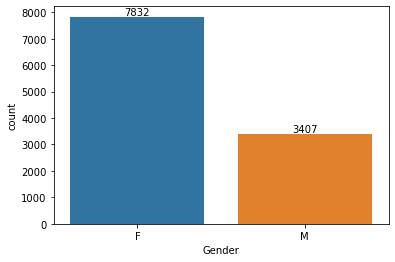

In [44]:
#  ploting a bar chart for gender and its count

ax=sns.countplot(x='Gender',data=df)
for bar in ax.containers:
    ax.bar_label(bar)

<AxesSubplot:xlabel='Gender', ylabel='Amount'>

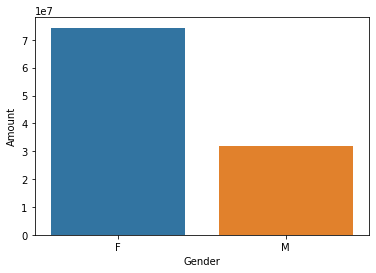

In [45]:
# ploting a bar chart for gender vs total amount

sales_gen = df.groupby( ['Gender'] , as_index = False)['Amount'].sum().sort_values(by ='Amount',ascending=False)
sns.barplot(x ='Gender', y ='Amount', data = sales_gen)

# From above graphs we can see that most of the buyers are females and even the purchasing power of females are greater than men

# Age Group

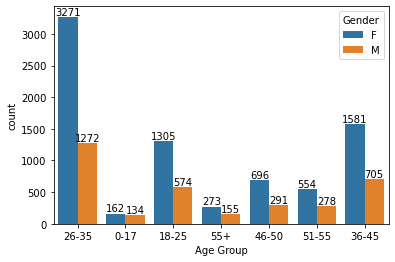

In [6]:
# ploting a bar chart for age group and its count acording to gender

ax = sns.countplot(x = 'Age Group',data=df,hue='Gender')
for bar in ax.containers:
    ax.bar_label(bar)

<AxesSubplot:xlabel='Age Group', ylabel='Amount'>

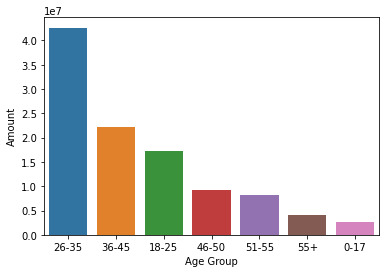

In [7]:
# age group vs total amount
sales_age = df.groupby(['Age Group'], as_index = False)['Amount'].sum().sort_values( by = 'Amount',ascending = False)
sns.barplot(x = 'Age Group',y = 'Amount',data= sales_age)

# from above graph we can see that most of the buyers are of age group between 26-35 yr female 

# State

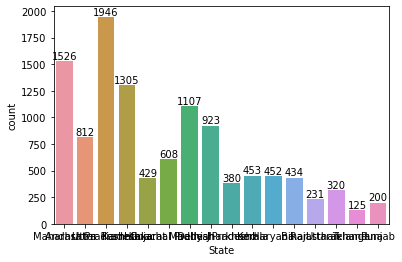

In [10]:
# ploting bar chart for states and its count

ax= sns.countplot(x= 'State',data= df)
for bar in ax.containers:
    ax.bar_label(bar)

<AxesSubplot:xlabel='State', ylabel='Orders'>

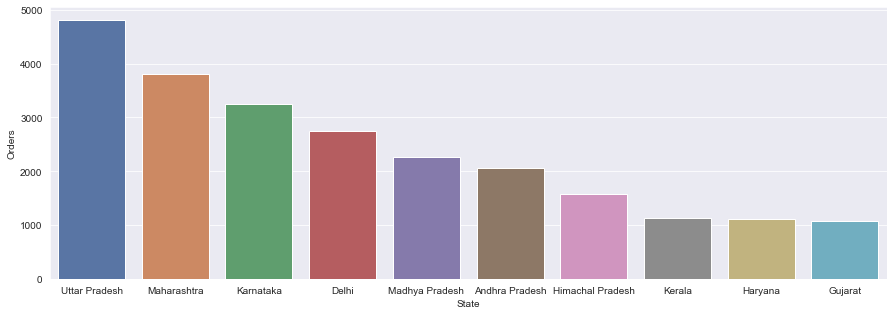

In [16]:
# total number of orders from top 10 states

sales_state = df.groupby(['State'], as_index=False)['Orders'].sum().sort_values(by='Orders', ascending=False).head(10)
sns.set({'figure.figsize': (15,5)})
sns.barplot(x='State', y = 'Orders', data = sales_state)


<AxesSubplot:xlabel='State', ylabel='Amount'>

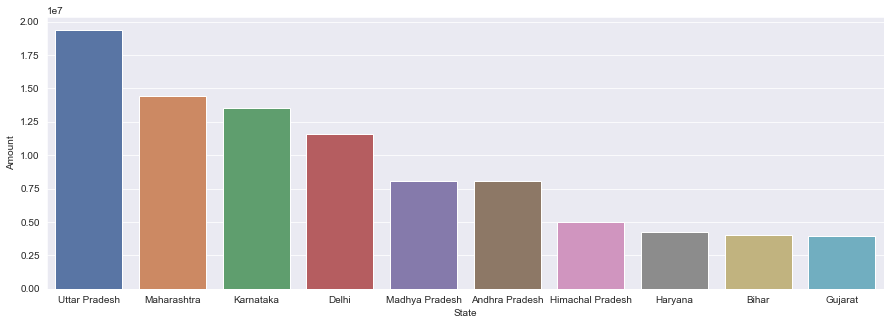

In [19]:
sales_state = df.groupby(['State'],as_index= False)['Amount'].sum().sort_values(by='Amount', ascending=False).head(10)
sns.set({'figure.figsize':(15,5)})
sns.barplot(x = 'State', y = 'Amount', data = sales_state)

# from above graph we can see the most of the orders and total sales/amount are from uttar pradesh,maharashtra,and karnataka respectively

# Occupation

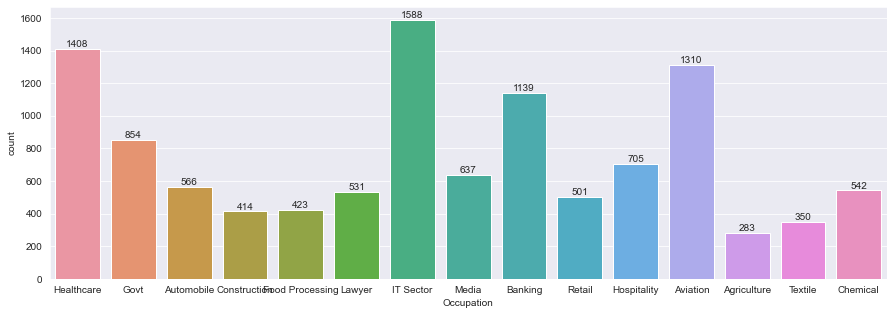

In [22]:
# total count of occuption 
ax = sns.countplot(data= df , x = 'Occupation')
for bar in ax.containers:
    ax.bar_label(bar)

<AxesSubplot:xlabel='Occupation', ylabel='Amount'>

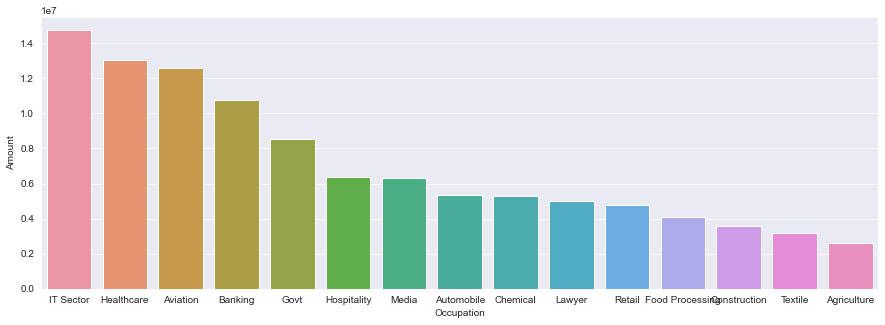

In [21]:
# total sales from ocupation
sales_ocu = df.groupby(['Occupation'],as_index= False)['Amount'].sum().sort_values(by='Amount', ascending=False)
sns.barplot( x= 'Occupation', y = 'Amount', data = sales_ocu)

# from above graph we can see that most of the buyers are working in IT, Healthcare, Aviation sectore

# product category

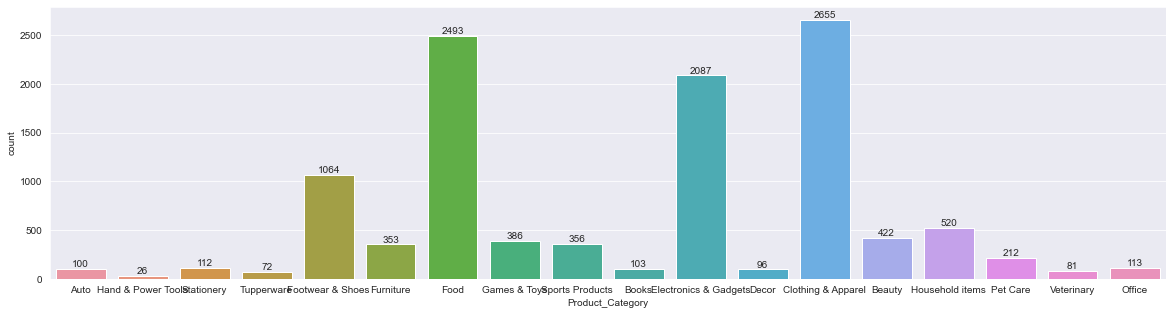

In [27]:
sns.set({'figure.figsize':[20,5]})
ax = sns.countplot(data = df ,x='Product_Category')
for bar in ax.containers:
    ax.bar_label(bar)

<AxesSubplot:xlabel='Product_Category', ylabel='Amount'>

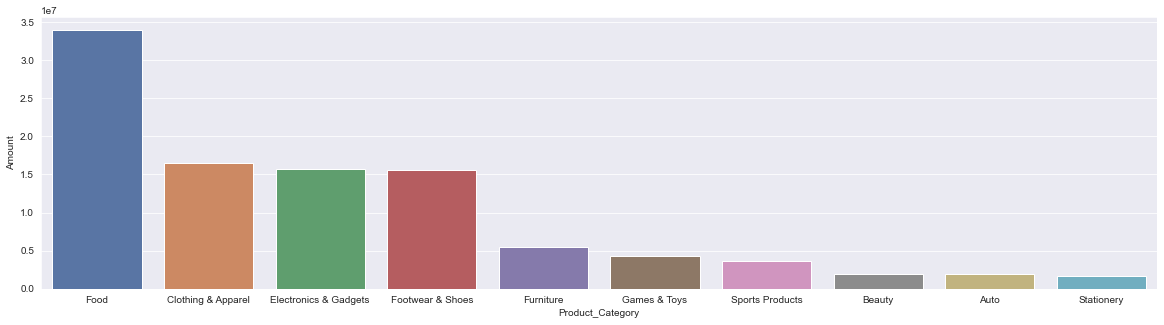

In [31]:
sales_pro = df.groupby(['Product_Category'],as_index=False).sum().sort_values(by='Amount', ascending=False).head(10)
sns.set({'figure.figsize':[20,5]})
sns.barplot(data = sales_pro, x = 'Product_Category', y = 'Amount')

# from above graph we can see that most of the sold product are from Food,Clothing and Electronics category

<AxesSubplot:xlabel='Product_ID', ylabel='Orders'>

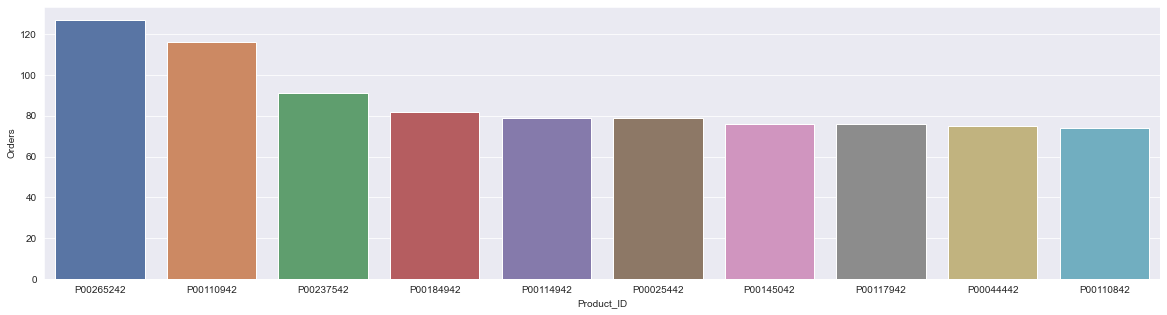

In [34]:
sales_pro = df.groupby(['Product_ID'],as_index= False).sum().sort_values(by='Orders', ascending=False).head(10)
sns.barplot(data = sales_pro,x= 'Product_ID',y= 'Orders')

# Conclusion:

# Women in age group 26-35 yrs from UP, Maharastra and Karnataka working in IT, Healthcare and Aviation are more likely to buy products from Food, Clothing and Electronics category